In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = os.path.join(".", "Data Used", "BYAREA.csv")

In [5]:
data = pd.read_csv(file)

In [6]:
#dropping unnecessary labels:
data = data.drop(labels = ["AGE_ADJUSTED_RATE",'AGE_ADJUSTED_CI_UPPER', 'AGE_ADJUSTED_CI_LOWER', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'] ,axis = 1)
data.head()

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
0,Alabama,9299,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999
1,Alabama,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999
2,Alabama,9467,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000
3,Alabama,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000
4,Alabama,9969,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001


In [7]:
#remove random cities/regions, returning only whole states:
data = data.loc[(data["AREA"] == "Alabama") | (data["AREA"] == "Alaska") | (data["AREA"] == "Arizona") | (data["AREA"] == "Arkansas")
                 | (data["AREA"] == "California") | (data["AREA"] == "Colorado") | (data["AREA"] == "Connecticut") | (data["AREA"] == "Delaware")
                 | (data["AREA"] == "District of Columbia") | (data["AREA"] == "Florida") | (data["AREA"] == "Georgia") | (data["AREA"] == "Hawaii")
                | (data["AREA"] == "Idaho") | (data["AREA"] == "Illinois") | (data["AREA"] == "Indiana") | (data["AREA"] == "Iowa")
                 | (data["AREA"] == "Kansas") | (data["AREA"] == "Kentucky") | (data["AREA"] == "Louisiana") | (data["AREA"] == "Maine") | (data["AREA"] == "Maryland")
                 | (data["AREA"] == "Massachusetts") | (data["AREA"] == "Michigan") | (data["AREA"] == "Minnesota") | (data["AREA"] == "Mississippi")
                 | (data["AREA"] == "Missouri") | (data["AREA"] == "Montana") | (data["AREA"] == "Nebraska") | (data["AREA"] == "Nevada") | (data["AREA"] == "New Hampshire")
                 | (data["AREA"] == "New Jersey") | (data["AREA"] == "New Mexico") | (data["AREA"] == "New York") | (data["AREA"] == "North Carolina") | (data["AREA"] == "North Dakota")
                 | (data["AREA"] == "Ohio") | (data["AREA"] == "Oklahoma") | (data["AREA"] == "Oregon") | (data["AREA"] == "Pennsylvania") | (data["AREA"] == "Rhode Island")
                 | (data["AREA"] == "South Carolina") | (data["AREA"] == "South Dakota") | (data["AREA"] == "Tennessee") | (data["AREA"] == "Texas") | (data["AREA"] == "Utah")
                 | (data["AREA"] == "Vermont") | (data["AREA"] == "Virginia") | (data["AREA"] == "Washington") | (data["AREA"] == "West Virginia") | (data["AREA"] == "Wisconsin")
                 | (data["AREA"] == "Wyoming")]

#remove this single year parameter from years
data = data[(data["YEAR"] != "2010-2014")]
data = data[(data["YEAR"] != "2011")]
data = data[(data["YEAR"] != "2012")]
data = data[(data["YEAR"] != "2013")]
data = data[(data["YEAR"] != "2014")]

In [8]:
#create dataframe that is only a total of all races, genders and cancers:
all_data = data[(data["SITE"] == "All Cancer Sites Combined") & (data["RACE"] == "All Races") & (data["SEX"] == "Male and Female")]

#reset index and remove subsequent index column that is created so that the below for loop will work:
all_data.reset_index(inplace = True)
all_data.drop(labels="index", axis = 1, inplace=True)

#there are some columns with "~" for "COUNT". These "~", "COUNT" values are always an "incidence"
#and there is no "incidence" data for that state in that year. There is "mortality" data for that state and year,
#but this is irrelevant without "incidence" data. The "mortality" data for that state and that year will always be
#the next row following the "incidence" data. The following for loop will remove the rows with a "~" value as well 
#as the following row with "mortality" data. This is not a common occurence within the dataset and can be safely ignored.
#The following for loop will remove those rows as well as the following, related row. 
for index, row in all_data.iterrows():
    if row["COUNT"] == "~":
        all_data.drop(index, inplace = True)
        all_data.drop(index + 1, inplace = True)

#The following will convert "COUNT" to integers, as they were imported as objects. 
all_data["COUNT"] = pd.to_numeric(all_data["COUNT"])

#the following is just to check that the above for loop worked. Arkansas had a "COUNT" value of "~" in 1999 and 2000,
#so this should show us if those years are skipped
all_data.loc[all_data["AREA"] == "Arkansas"].head()

/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
76,Arkansas,13235,Incidence,2691571,All Races,Male and Female,All Cancer Sites Combined,2001
77,Arkansas,6091,Mortality,2691571,All Races,Male and Female,All Cancer Sites Combined,2001
78,Arkansas,13253,Incidence,2705927,All Races,Male and Female,All Cancer Sites Combined,2002
79,Arkansas,6282,Mortality,2705927,All Races,Male and Female,All Cancer Sites Combined,2002
80,Arkansas,13830,Incidence,2724816,All Races,Male and Female,All Cancer Sites Combined,2003


In [9]:
#adding column with count of incidences and mortalities per population of state that year
all_data["% of Population"] = (all_data["COUNT"]/all_data["POPULATION"])*100

#create two separate datasets for incidence and mortality 
all_pop_incidence_data = all_data.loc[all_data["EVENT_TYPE"] == "Incidence"]
all_pop_mortality_data = all_data.loc[all_data["EVENT_TYPE"] == "Mortality"]

#create new dataframes based on groupbys that give us the average of the % of population to have a 
#cancer incidence or mortality from 1999-2010
#creation of these dataframes is not neccessary to create the below combined dataframe with both 
#incidence and mortality data... but we can use them if we want
state_pop_incidences_df = pd.DataFrame(all_pop_incidence_data.groupby(["AREA"]).mean())
state_pop_incidences_df.reset_index(inplace = True)
state_pop_incidences_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

state_pop_mortality_df = pd.DataFrame(all_pop_mortality_data.groupby(["AREA"]).mean())
state_pop_mortality_df.reset_index(inplace = True)
state_pop_mortality_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

state_pop_incidence_mortality_combined_df = pd.DataFrame({"State": state_pop_incidences_df["AREA"], "Incidence %": state_pop_incidences_df["% of Population"],
                                                          "Mortality %": state_pop_mortality_df["% of Population"] })

state_pop_incidence_mortality_combined_df.head()

/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Incidence %,Mortality %,State
0,0.491858,0.216210,Alabama
1,0.359696,0.115440,Alaska
2,0.435058,0.169395,Arizona
3,0.509792,0.225758,Arkansas
4,0.417784,0.153199,California


In [10]:
#need to reset index so that when we do the below division of one column and another, the index values match 
all_pop_mortality_data.reset_index(inplace = True)
all_pop_mortality_data.drop(labels="index", axis = 1, inplace=True)

all_pop_incidence_data.reset_index(inplace = True)
all_pop_incidence_data.drop(labels = "index", axis = 1, inplace = True)

#creating dictionary to use for DataFrame about mortality rates
state_mortality_total_dict = {"State": all_pop_incidence_data["AREA"], 
                              "Mortality Rate": (all_pop_mortality_data["COUNT"]/all_pop_incidence_data["COUNT"]*100), 
                              "Year": all_pop_incidence_data["YEAR"]}

state_mortality_rate_df = pd.DataFrame.from_dict(state_mortality_total_dict)

#the above DataFrame will have mortality rate for every year for each state, the below groupby will allow us to 
#have the average of those for each state in a new DataFrame
average_state_mortality_df = pd.DataFrame(state_mortality_rate_df.groupby(["State"]).mean())
average_state_mortality_df.reset_index(inplace = True)

average_state_mortality_df.head()

/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Mortality Rate
0,Alabama,44.169234
1,Alaska,32.106907
2,Arizona,38.962015
3,Arkansas,44.313548
4,California,36.707565


/Users/heathersolis86/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


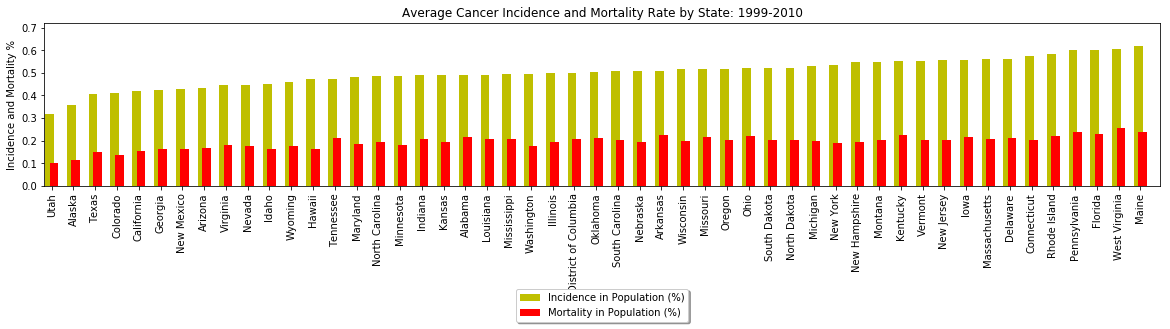

In [11]:
state_pop_incidence_mortality_combined_df.sort_values("Incidence %", ascending = True, inplace = True)

x_axis = np.arange(len(state_pop_incidence_mortality_combined_df))
tick_locations = [value+0.1 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, state_pop_incidence_mortality_combined_df["State"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(state_pop_incidence_mortality_combined_df["Incidence %"])+.1)

plt.title("Average Cancer Incidence and Mortality Rate by State: 1999-2010")
plt.ylabel("Incidence and Mortality %")

ax = plt.subplot(111)
incidence_bar = ax.bar(x_axis-0.2, state_pop_incidence_mortality_combined_df["Incidence %"], width=0.4,color='y',align='edge', label = "Incidence in Population (%)")
mortality_bar = ax.bar(x_axis, state_pop_incidence_mortality_combined_df["Mortality %"], width=0.4 ,color='r',align='edge', label = "Mortality in Population (%)")

plt.legend(handles=[incidence_bar, mortality_bar], loc = "upper center", bbox_to_anchor=(0.5, -0.6), shadow = True )

plt.show()

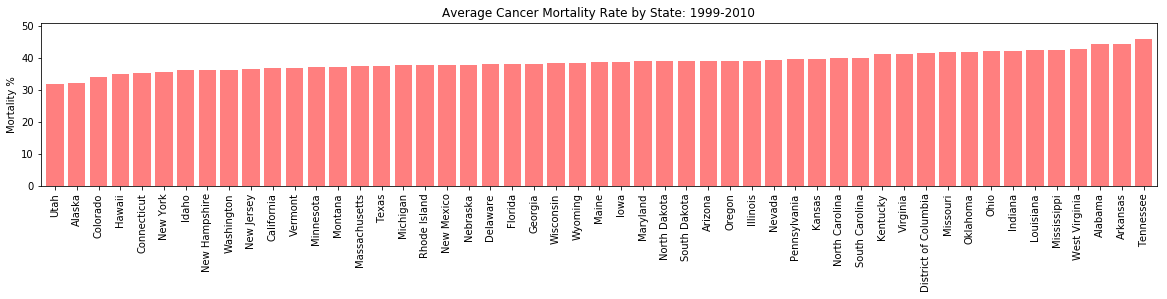

In [12]:
average_state_mortality_df.sort_values("Mortality Rate", ascending = True, inplace = True)

x_axis = np.arange(len(average_state_mortality_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, average_state_mortality_df["State"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(average_state_mortality_df["Mortality Rate"])+5)

plt.title("Average Cancer Mortality Rate by State: 1999-2010")
plt.ylabel("Mortality %")

avg_state_mortality_bar = plt.bar(x_axis, average_state_mortality_df["Mortality Rate"], alpha = .5, color = "r", align="edge")
plt.show()

In [13]:
# Import Health Related Quality of Life data & create dataframe
hrqol_file = os.path.join(".", "Data Used", "HRQOL Data.csv")

# Create HRQOL Dataframe
hrqol_df = pd.read_csv(hrqol_file)

In [14]:
# Drop unused columns:
hrqol_df = hrqol_df.drop(labels = ['LocationAbbr','DataSource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol','Data_Value_Footnote','Data_Value_Std_Err','Low_Confidence_Limit','High_Confidence_Limit','GeoLocation','CategoryId','TopicId','QuestionId','LocationId','BreakOutId','BreakOutCategoryid','Category','Topic','Question','Sample_Size','Break_Out','Break_Out_Category','Unnamed: 25'] ,axis = 1)
hrqol_df = hrqol_df.rename(columns={'LocationDesc' : 'State'})
hrqol_df.head()

,Year,State,HRQOL
0,2010,Alabama,2.7
1,2010,Alabama,5.8
2,2010,Alabama,7.7
3,2010,Alabama,14.8
4,2010,Alabama,14.0


In [ ]:
hrqol_df.sort_values("HRQOL", ascending = True, inplace = True)

x_axis = np.arange(len(hrqol_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, hrqol_df["State"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(average_state_mortality_df["HRQOL"])+5)

plt.title("Average HRQOL by State: 1999-2010")
plt.ylabel("HRQOL")

avg_state_hrqol = plt.bar(x_axis, hrqol_df["HRQOL"], alpha = .5, color = "r", align="edge")
plt.show()

In [119]:
# Create a dataframe for the time period 1999 - 2010
avg_state_hrqol_df = pd.DataFrame(hrqol_df.groupby(hrqol_df['State']).mean())
avg_state_hrqol_df.reset_index(inplace = True)
avg_state_hrqol_df.drop(labels = ["Year"], axis = 1, inplace = True)
avg_state_hrqol_df.head()

,State,HRQOL
0,Alabama,14.017941
1,Alaska,9.326015
2,Arizona,9.917931
3,Arkansas,13.766876
4,California,11.814781


In [138]:
# Create a combined dataframe to include average HRQOL, mortality of incidences, and incidence rates of population
hmi_combined_df = pd.DataFrame({"State": average_state_mortality_df["State"], "Incidence Rate": state_pop_incidences_df["% of Population"],
                                "Mortality Rate": average_state_mortality_df["Mortality Rate"],"HRQOL Rate": avg_state_hrqol_df["HRQOL"]})

# Reorder the columns
hmi_combined_df = hmi_combined_df[['State', 'Incidence Rate', 'Mortality Rate', 'HRQOL Rate']]
hmi_combined_df.head()

,State,Incidence Rate,Mortality Rate,HRQOL Rate
0,Alabama,0.491858,44.169234,14.017941
1,Alaska,0.359696,32.106907,9.326015
2,Arizona,0.435058,38.962015,9.917931
3,Arkansas,0.509792,44.313548,13.766876
4,California,0.417784,36.707565,11.814781


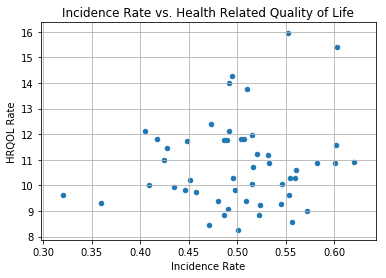

In [143]:
# Create a scatter plot comparing Incidence Rate vs. Health Related Quality of Life 
hmi_combined_df.plot(kind="scatter", x="Incidence Rate", y="HRQOL Rate", grid=True,
             title="Incidence Rate vs. Health Related Quality of Life")

plt.savefig('IRvHRQOL.png')
plt.show()

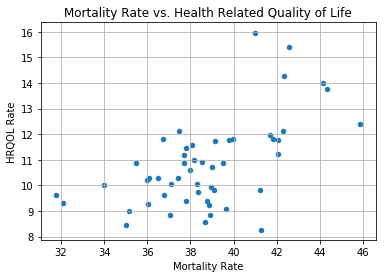

In [144]:
# Create a scatter plot comparing Mortality Rate vs. Health Related Quality of Life 
hmi_combined_df.plot(kind="scatter", x="Mortality Rate", y="HRQOL Rate", grid=True,
             title="Mortality Rate vs. Health Related Quality of Life")
plt.savefig('MRvHRQOL.png')
plt.show()